<a href="https://colab.research.google.com/github/MuhammadShafiAI/Deep-Learning-Lec/blob/main/Multi_class_classification_of_reuter_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from keras.datasets import reuters

In [4]:
(train_data,train_labels),(test_data,test_labels)=reuters.load_data(num_words=10000)

In [5]:
train_data.shape

(8982,)

In [6]:
test_data.shape

(2246,)

In [7]:
train_data[8]

[1,
 178,
 53,
 321,
 26,
 14,
 948,
 26,
 178,
 39,
 44,
 2860,
 3820,
 14,
 191,
 59,
 11,
 86,
 539,
 63,
 11,
 14,
 892,
 61,
 11,
 123,
 197,
 1245,
 258,
 44,
 11,
 15,
 58,
 462,
 26,
 53,
 14,
 597,
 61,
 11,
 15,
 58,
 19,
 942,
 15,
 53,
 105,
 39,
 633,
 472,
 927,
 53,
 46,
 22,
 710,
 220,
 851,
 2861,
 9,
 4297,
 282,
 5,
 317,
 65,
 9,
 659,
 249,
 2,
 196,
 47,
 11,
 428,
 410,
 61,
 59,
 20,
 22,
 10,
 29,
 254,
 17,
 12]

**Listing 3.13 Decoding newswires back to text**

In [8]:
word_index=reuters.get_word_index()
reverse_word_index=dict([(value,key) for (key, value) in word_index.items()])
decoded_newswire=' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])

550378/550378 ━━━━━━━━━━━━━━━━━━━━ 1s 1us/step


In [12]:
train_labels[10]

np.int64(3)

**Listing 3.15 Model definition**


In [15]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # Fix 1: Correct function name and add an extra pair of parentheses
    results = np.zeros((len(sequences), dimension))
    # Fix 2: Add a comma after 'i' and the missing 'for'
    for i, sequence in enumerate(sequences):
        # Fix 3: The assignment is correct, but ensure it's a float (1.0) for consistency
        results[i, sequence] = 1.0
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [18]:
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
   results[i, label] = 1.
  return results
  one_hot_train_labels = to_one_hot(train_labels)
  one_hot_test_labels = to_one_hot(test_labels)

In [21]:
from keras.utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [23]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['acc'])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**3.5.4 Validating your approach**

In [24]:
x_val =x_train[:1000]
partial_x_train=x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [26]:
history=model.fit(partial_x_train,partial_y_train,epochs=20, batch_size=512,validation_data=(x_val,y_val))

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - acc: 0.4110 - loss: 3.1425 - val_acc: 0.6020 - val_loss: 1.8216
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - acc: 0.6445 - loss: 1.6668 - val_acc: 0.6680 - val_loss: 1.4109
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - acc: 0.7197 - loss: 1.2591 - val_acc: 0.7230 - val_loss: 1.2199
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - acc: 0.7714 - loss: 1.0491 - val_acc: 0.7520 - val_loss: 1.1182
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - acc: 0.8150 - loss: 0.8496 - val_acc: 0.7730 - val_loss: 1.0240
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - acc: 0.8403 - loss: 0.7229 - val_acc: 0.7980 - val_loss: 0.9646
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - acc: 0.8819 - loss: 0.5883 - val_acc: 0.8040 - val_loss: 0.9183
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - acc: 0.8957 - loss: 0.5029 - val_acc: 0.8130 - val_loss: 0.8832
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - acc: 0.911

**Listing 3.19 Plotting the training and validation loss**

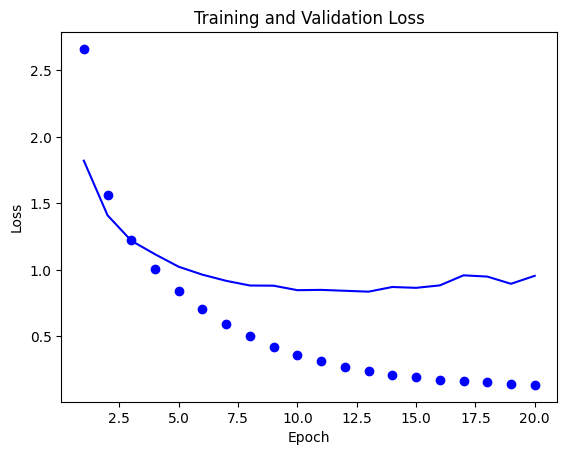

In [27]:
import matplotlib.pyplot as plt

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1,len(loss)+1)

plt.plot(epochs,loss,'bo', label='Trainig Loss')
plt.plot(epochs, val_loss,'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

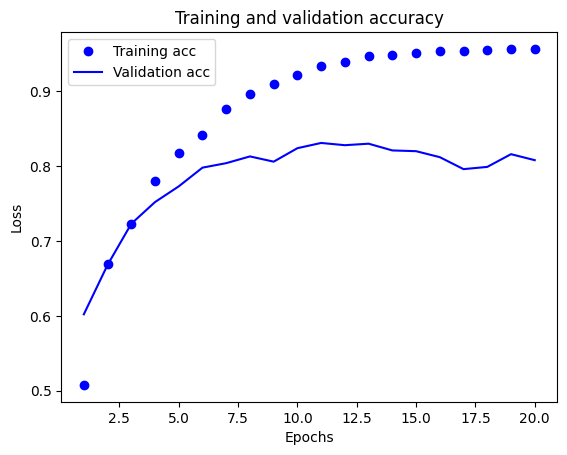

In [28]:
plt.clf()
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

**Listing 3.21 Retraining a model from scratch**

In [30]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=9,
batch_size=512,
validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - accuracy: 0.3450 - loss: 3.3349 - val_accuracy: 0.6000 - val_loss: 2.0135
Epoch 2/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 142ms/step - accuracy: 0.6416 - loss: 1.7923 - val_accuracy: 0.6910 - val_loss: 1.4425
Epoch 3/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - accuracy: 0.7266 - loss: 1.2855 - val_accuracy: 0.7340 - val_loss: 1.2332
Epoch 4/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.7680 - loss: 1.0692 - val_accuracy: 0.7630 - val_loss: 1.1151
Epoch 5/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.8154 - loss: 0.8643 - val_accuracy: 0.7650 - val_loss: 1.0374
Epoch 6/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.8453 - loss: 0.7259 - val_accuracy: 0.7780 - val_loss: 0.9776
Epoch 7/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.8709 - loss: 0.6259 - val_accuracy: 0.7790 - val_loss: 0.9702
Epoch 8/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.8923 - loss: 0.5325 - val_accuracy: 0.8050 - val_loss

In [31]:
results

[0.9612151384353638, 0.7804986834526062]

In [32]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.17809439002671415

In [34]:
predictions=model.predict(x_test)

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [35]:
predictions[0].shape

(46,)